In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
X['actual_productivity'] = y
# metadata
print(productivity_prediction_of_garment_employees.metadata)

# variable information
print(productivity_prediction_of_garment_employees.variables)


{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'ID': 399, 'type': 'NATIVE', 'title': 'Mining the productivity dat

In [ ]:
X.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


<Axes: title={'center': ' Productivity Over Time'}, xlabel='Date', ylabel='Productivity'>

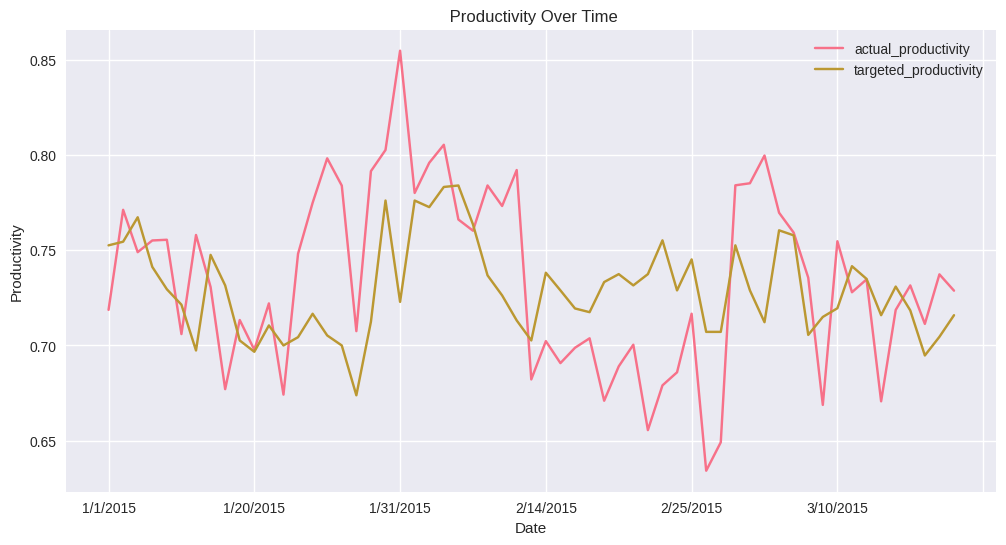

In [ ]:
X.groupby(['date']).agg({'actual_productivity': 'mean','targeted_productivity': 'mean'}).plot(
    title=' Productivity Over Time',
    xlabel='Date',
    ylabel='Productivity',
    figsize=(12, 6))

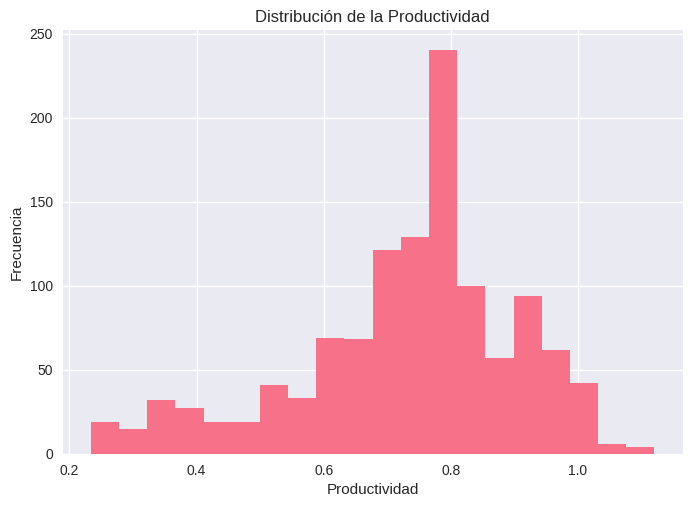

In [ ]:
# 1. Distribución de 'actual_productivity' (para definir clases)
plt.hist(y['actual_productivity'], bins=20)
plt.xlabel('Productividad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Productividad')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def plot_all_columns(df):
    # Get the number of columns
    n_cols = len(df.columns)

    # Calculate number of rows needed for subplot grid
    n_rows = (n_cols + 2) // 3  # 3 plots per row

    # Create a figure with subplots
    fig = plt.figure(figsize=(15, 5*n_rows))

    for idx, col in enumerate(df.columns, 1):
        plt.subplot(n_rows, 3, idx)

        # For numeric columns
        if pd.api.types.is_numeric_dtype(df[col]):
            # Histogram for numeric data
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f'Distribution of {col}')

        # For categorical columns
        else:
            # Bar plot for categorical data
            value_counts = df[col].value_counts()
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.xticks(rotation=45)
            plt.title(f'Count of {col}')

    plt.tight_layout()
    plt.show()

# Create additional visualizations for relationships
def plot_correlations(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Create correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

# Create additional visualizations for relationships
def plot_correlations(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Create correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

# For specific column types:
def plot_column_details(df, column_name):
    plt.figure(figsize=(10, 6))

    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Box plot for numeric data
        sns.boxplot(x=df[column_name])
        plt.title(f'Box Plot of {column_name}')
    else:
        # Pie chart for categorical data
        plt.pie(df[column_name].value_counts(),
                labels=df[column_name].value_counts().index,
                autopct='%1.1f%%')
        plt.title(f'Distribution of {column_name}')

    plt.show()

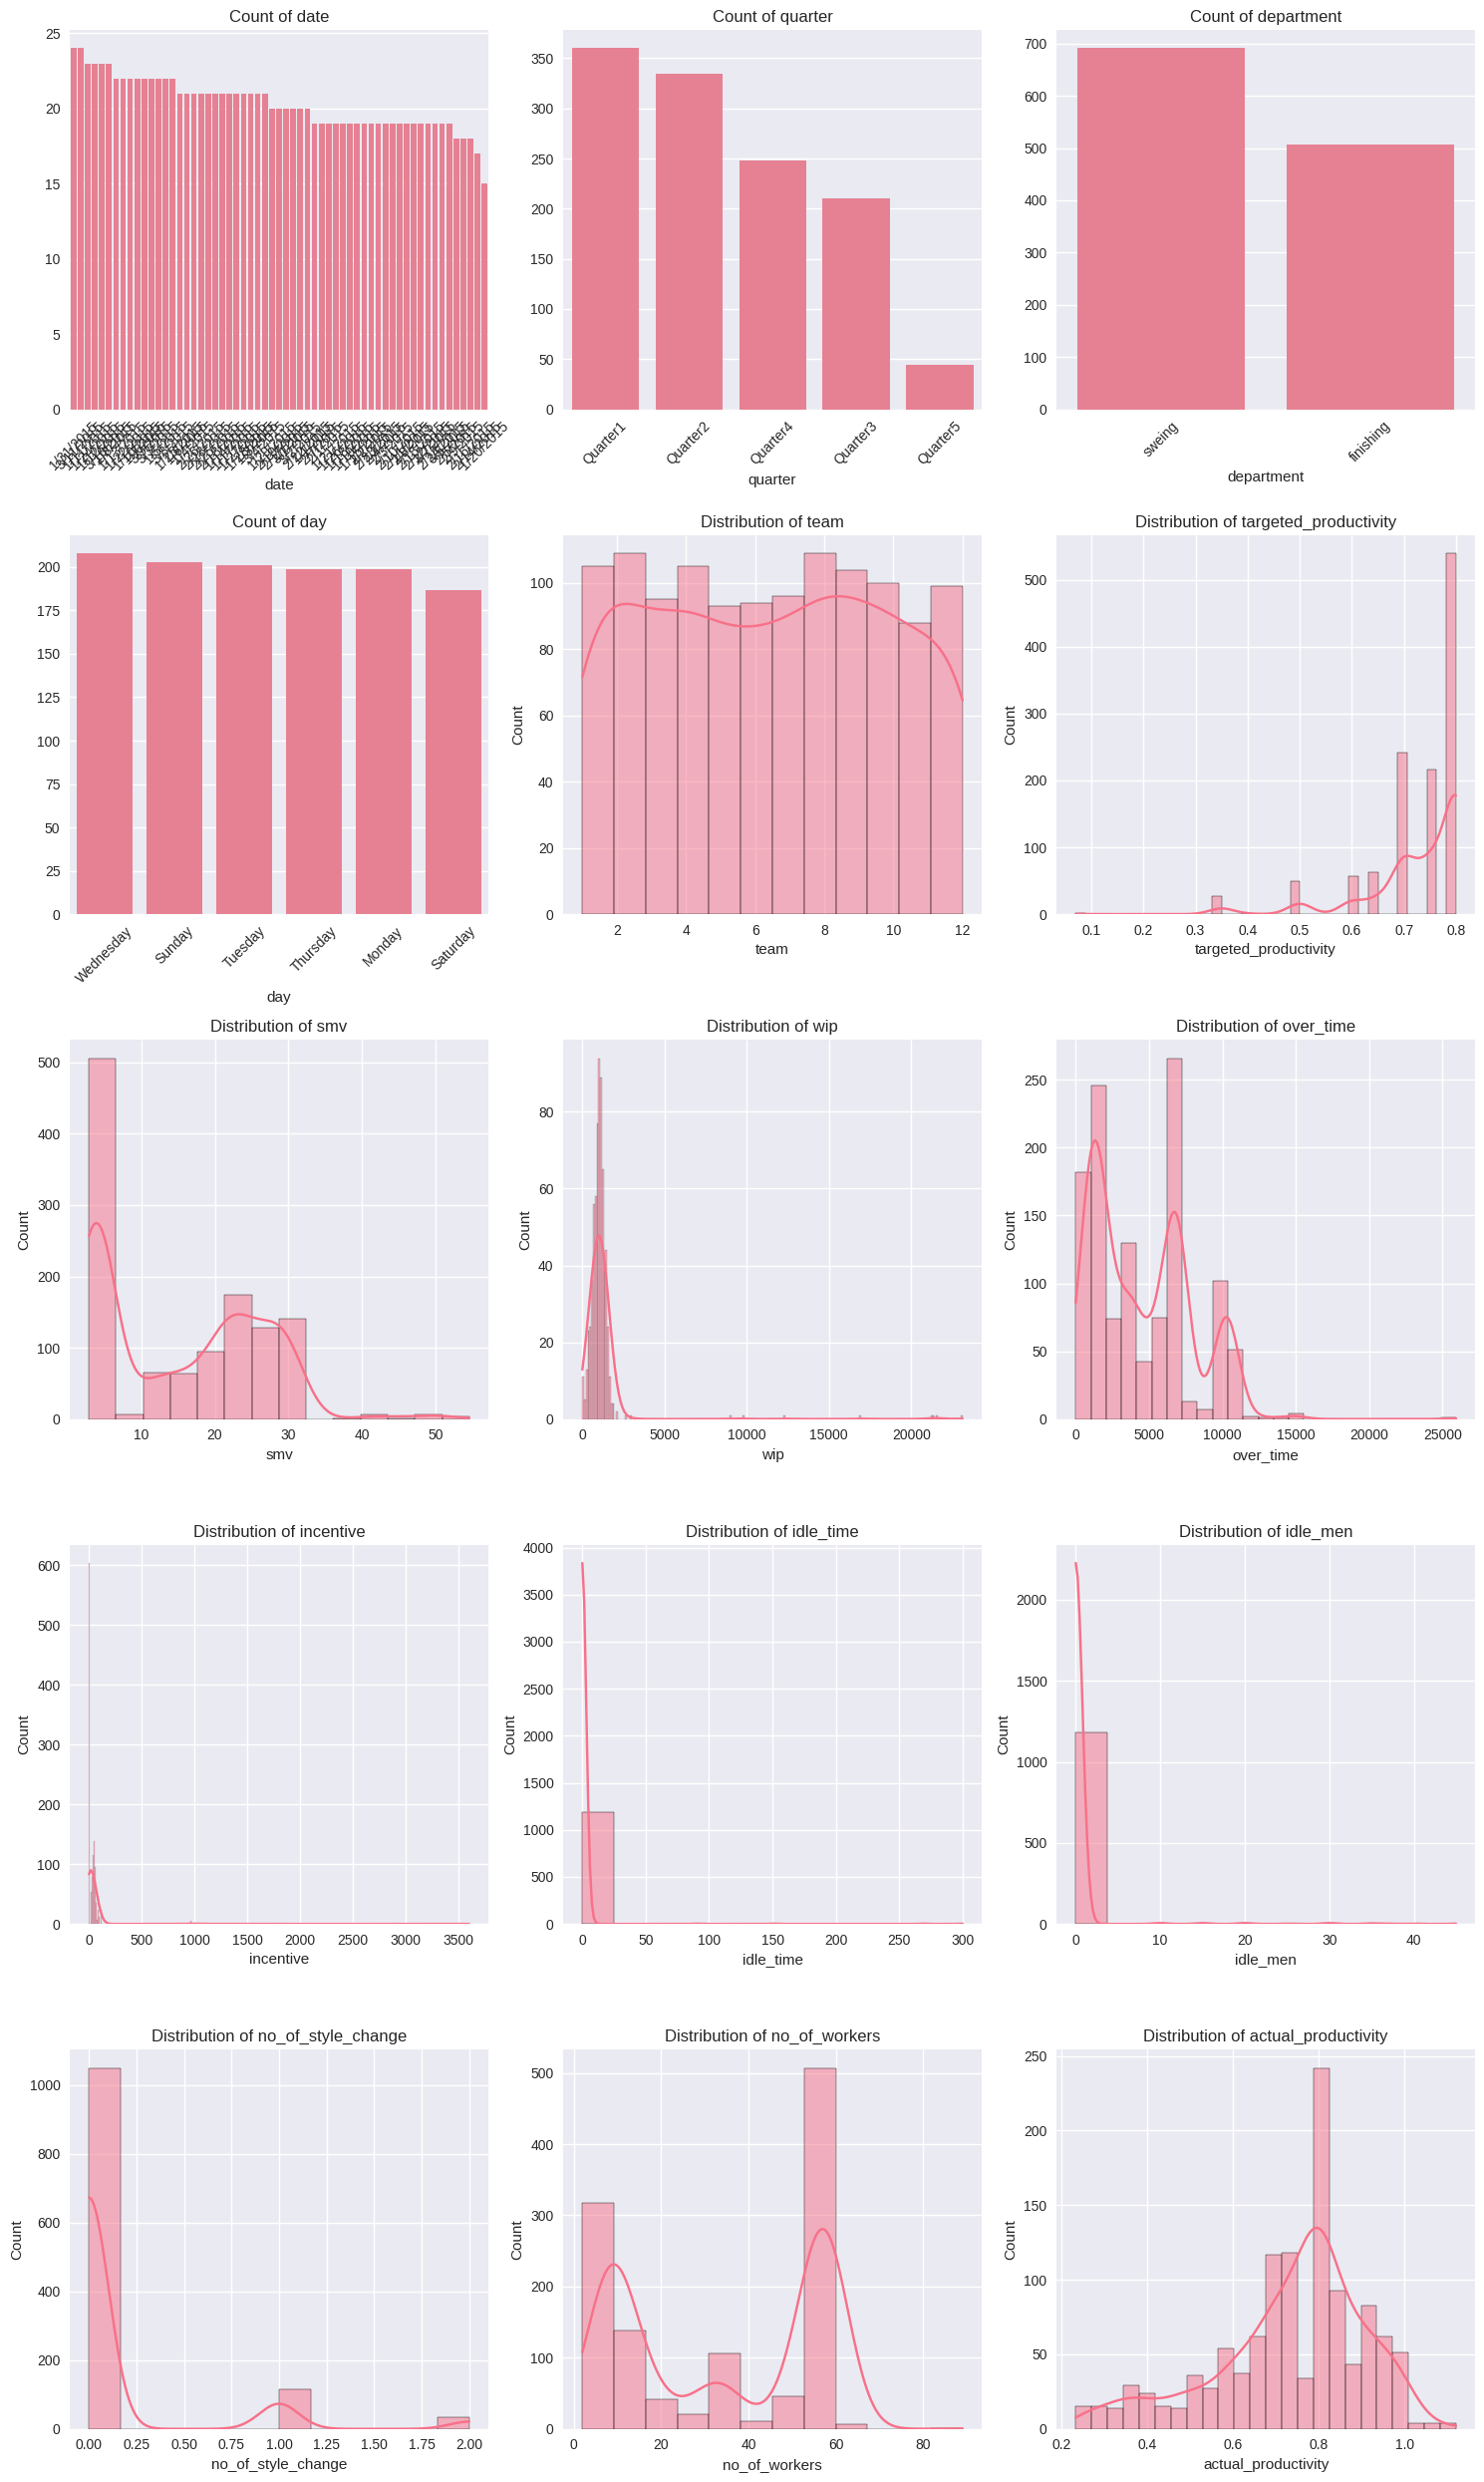

In [ ]:
plot_all_columns(X)

In [ ]:
# 2. Valores faltantes en 'wip'
print("Valores faltantes en 'wip':", X['wip'].isnull().sum())

Valores faltantes en 'wip': 506


In [ ]:
# 3. Cardinalidad de variables categóricas
print("\nCategorías únicas:")
print("Departamento:", X['department'].unique())
print("Día de la semana:", X['day'].unique())
print("Trimestre:", X['quarter'].unique())
print("Equipos:", X['team'].nunique())


Categorías únicas:
Departamento: ['sweing' 'finishing']
Día de la semana: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Trimestre: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Equipos: 12


In [ ]:
# 4. Rango de fechas
print("\nRango de fechas:")
print("Mínima:", X['date'].min())
print("Máxima:", X['date'].max())


Rango de fechas:
Mínima: 1/1/2015
Máxima: 3/9/2015


In [ ]:
# Drop columns
# At least 98% is 0
X.drop(columns=['idle_men'], inplace=True)

In [ ]:
# Add day and monthss
X['day_of_year'] = pd.to_datetime(X['date']).dt.dayofyear
X['day_of_month'] = pd.to_datetime(X['date']).dt.day
X['month'] = pd.to_datetime(X['date']).dt.month
X.drop(columns=['date'], inplace=True)

# Date range 01/01/2015 to 09/03/2015
# Every happends in the same year and first three months.

In [ ]:
# One hot encoding

dept_dummies = pd.get_dummies(X['department'], prefix='dept_')

# Join the encoded columns back to the original dataframe
X = pd.concat([X, dept_dummies], axis=1)

# Optionally remove the original department column
X.drop('department', axis=1, inplace=True)

In [ ]:
# One hot encoding

style_dummies = pd.get_dummies(X['no_of_style_change'], prefix='style_no_')

# Join the encoded columns back to the original dataframe
X = pd.concat([X, style_dummies], axis=1)

# Optionally remove the original department column
X.drop('no_of_style_change', axis=1, inplace=True)

In [ ]:
# One hot encoding

day_dummies = pd.get_dummies(X['day'], prefix='day_')

# Join the encoded columns back to the original dataframe
X = pd.concat([X, day_dummies], axis=1)

# Optionally remove the original department column
X.drop('day', axis=1, inplace=True)

In [ ]:
# One hot encoding

team_dummies = pd.get_dummies(X['team'], prefix='team_')

# Join the encoded columns back to the original dataframe
X = pd.concat([X, team_dummies], axis=1)

# Optionally remove the original department column
X.drop('team', axis=1, inplace=True)

In [ ]:
# Quarter data is from values to 1 to 5, in three months?
X.drop(columns=['quarter'], inplace=True)
X.drop_duplicates(inplace=True)

### Solución 1: Clasificación Básica (Sin Técnicas Avanzadas)

In [ ]:
# Eliminar filas con productividad > 1 (errores)
X = X.drop(X[X.actual_productivity > 1].index)

In [ ]:
# Drop duplicate columns
X.drop_duplicates(inplace=True)

In [ ]:
# Discretizar la variable objetivo
# Clasificación binaria: Baja (<0.6), Alta (>=0.6)
y_bin = pd.cut(X['actual_productivity'], bins=[0, 0.6, 1], labels=['Baja', 'Alta'])

In [ ]:
# Clasificación multiclase: Baja (<0.6), Media (0.6-0.9), Alta (>=0.9)
y_multi = pd.cut(X['actual_productivity'], bins=[0, 0.6, 0.9, 1], labels=['Baja', 'Media', 'Alta'])

### Procesamiento Manual de Variables

In [ ]:
# Definir columnas numéricas y categóricas
numeric_features = ['targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'no_of_workers']
categorical_features = ['department', 'day', 'quarter', 'team']

# Imputar valores faltantes en 'wip'
#X['wip'] = X['wip'].fillna(X['wip'].median())

# Se escala variables numéricas
scaler = StandardScaler()

# Se codifica variables categóricas
#encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#X_cat = encoder.fit_transform(X[categorical_features])

# Combinar variables numéricas y categóricas
X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [ ]:
X.drop(columns=['actual_productivity'], inplace=True)

KeyError: "['actual_productivity'] not found in axis"

### Entrenar Modelos (Ejemplo para Clasificación Binaria)

In [ ]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print("Precisión (Binaria):", accuracy_score(y_test, y_pred))

Precisión (Binaria): 0.8764367816091954


## Solución 2: Clasificación Avanzada (Con Balanceo y Optimización)

### Balanceo de Clases (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

# Dividir datos originales (sin balancear)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

# Aplicar SMOTE solo en entrenamiento (ejemplo para clasificación multiclase)
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_train, y_train)

### Optimizar Hiperparámetros (GridSearchCV)

In [ ]:
"""
from sklearn.model_selection import GridSearchCV

# Definir parámetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Búsqueda en grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5
)
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrica para multiclase
    cv=5,
    n_jobs=-1
)

# Ejecutar búsqueda en datos balanceados
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

### Evaluación en Conjunto de Prueba No Balanceado

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir en datos de prueba originales (no balanceados)
y_pred = best_model.predict(X_test)

# Métricas detalladas
print("Reporte de Clasificación (Datos Reales):\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

### Validación Cruzada y Evaluación

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(best_model, X_bal, y_bal, cv=5, scoring='f1_weighted')
print("F1-score promedio:", np.mean(scores))


# Evaluar en datos de prueba
#X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)
#y_pred = best_model.predict(X_test)
#print("Precisión (Multiclase):", accuracy_score(y_test, y_pred))